In [1]:
import os 
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import imghdr
import warnings 

2024-03-26 11:29:40.095309: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 11:29:40.095436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 11:29:40.378080: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
warnings.filterwarnings("ignore")

In [3]:

device_name = tf.test.gpu_device_name()

if "GPU" not in device_name:
    print("GPU device not found")
    
print('Found GPU at: {}'.format(device_name))

print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

Found GPU at: /device:GPU:0
GPU available (YESS!!!!)


In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
gpu_strategy = tf.distribute.MirroredStrategy()

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [7]:
#train_folder_path = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/'

folder_path = '/kaggle/input/ai-generated-images-vs-real-images/'
#This is unseen one after the model is implemented 
#test_folder_path = '/kaggle/input/ai-generated-images-vs-real-images/'

In [8]:
#train_path = train_folder_path  +'train/'
#val_path = train_folder_path + 'test/'

In [9]:
print(folder_path)

/kaggle/input/ai-generated-images-vs-real-images/


In [10]:

class_names = os.listdir(folder_path)

In [11]:
print(class_names)

['RealArt', 'AiArtData']


In [12]:
#os.listdir(os.path.join(class_name,'/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/FAKE'))

In [13]:
#os.listdir(os.path.join(class_name,'/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/REAL'))

In [14]:
img = cv2.imread(os.path.join('/kaggle/input/ai-generated-images-vs-real-images/AiArtData/AiArtData/-how-important-people-from-the-past-really-looked-11-Pics-5ffd5c0f4d77f__880.jpg'))

## Image Loading


In [15]:
type(img)

numpy.ndarray

In [16]:
img 

array([[[34, 50, 49],
        [36, 51, 53],
        [37, 53, 59],
        ...,
        [34, 42, 59],
        [37, 45, 62],
        [47, 55, 72]],

       [[25, 40, 42],
        [28, 43, 45],
        [32, 46, 52],
        ...,
        [33, 41, 58],
        [36, 44, 61],
        [44, 52, 69]],

       [[21, 34, 36],
        [27, 40, 42],
        [33, 48, 51],
        ...,
        [32, 40, 57],
        [34, 42, 59],
        [42, 50, 67]],

       ...,

       [[35, 43, 72],
        [39, 46, 73],
        [41, 48, 75],
        ...,
        [39, 46, 66],
        [37, 44, 64],
        [42, 48, 71]],

       [[40, 47, 74],
        [40, 47, 74],
        [42, 46, 74],
        ...,
        [41, 48, 68],
        [41, 47, 70],
        [41, 47, 70]],

       [[52, 59, 86],
        [52, 56, 84],
        [52, 57, 82],
        ...,
        [37, 43, 66],
        [37, 43, 66],
        [34, 40, 63]]], dtype=uint8)

In [17]:
img.shape

(440, 880, 3)

In [18]:
strategy = tf.distribute.MirroredStrategy()

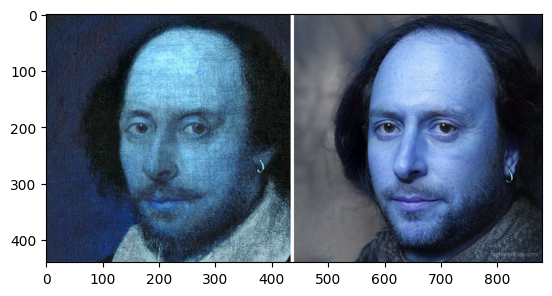

In [19]:
plt.imshow(img)

plt.show()

In [90]:
#tf.keras.utils.image_dataset_from_directory??

In [152]:
#Building data pipeline 
data = tf.keras.utils.image_dataset_from_directory(folder_path)

Found 971 files belonging to 2 classes.


In [153]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [154]:
#Allowing access of the data 
data_iterator = data.as_numpy_iterator()

In [155]:
data_iterator

In [156]:
#Accessing the data pipeline in batchs 
batch = data_iterator.next()

***Len of batch 2 refers to the 2 parts of the data one being the images and the other being the labels of the images ***

In [157]:
len(batch)

2

**Batch[0] is the images and Batch[1] is the label for the images**

In [158]:
batch[0].size

6291456

In [159]:
batch[0].shape

(32, 256, 256, 3)

In [160]:
batch

(array([[[[202.       , 232.       , 246.       ],
          [202.       , 232.       , 246.       ],
          [202.       , 232.       , 246.       ],
          ...,
          [202.       , 232.       , 246.       ],
          [202.       , 232.       , 246.       ],
          [202.       , 232.       , 246.       ]],
 
         [[202.       , 232.       , 246.       ],
          [202.       , 232.       , 246.       ],
          [202.       , 232.       , 246.       ],
          ...,
          [202.       , 232.       , 246.       ],
          [202.       , 232.       , 246.       ],
          [202.       , 232.       , 246.       ]],
 
         [[202.       , 232.       , 246.       ],
          [202.       , 232.       , 246.       ],
          [202.       , 232.       , 246.       ],
          ...,
          [202.       , 232.       , 246.       ],
          [202.       , 232.       , 246.       ],
          [202.       , 232.       , 246.       ]],
 
         ...,
 
         [[1

**1 or 0 represent fake or real(not certain which reps which ;) looking at the below images probly 1 is real and 0 is AI**

In [161]:
batch[1]

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int32)

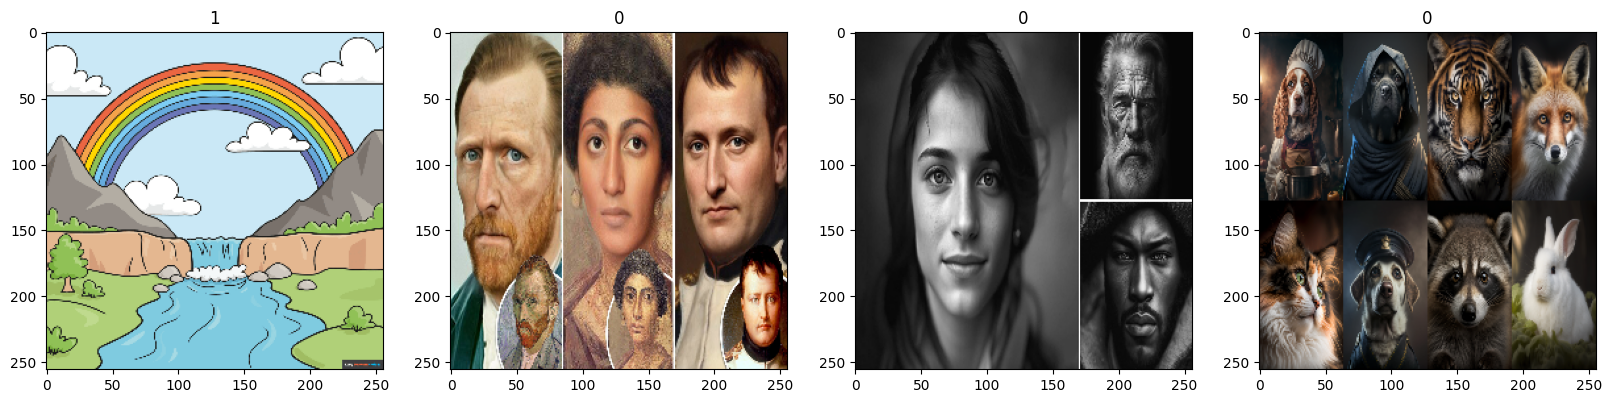

In [162]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**Preprocessing:Scaling from 0-255 to 0-1**

In [163]:
batch[0].min()

0.0

In [164]:
batch[0].max()

255.0

In [165]:
Scaled = batch[0] / 255

In [166]:
Scaled.min()

0.0

In [167]:
Scaled.max()

1.0

Helps to map the scale as we are pulling data from the data pipeline 

In [168]:
data = data.map(lambda x,y:(x/255,y))

In [169]:
scaled_iterator = data.as_numpy_iterator()

In [170]:
batch = scaled_iterator.next()

In [171]:
batch[0].min()

0.0

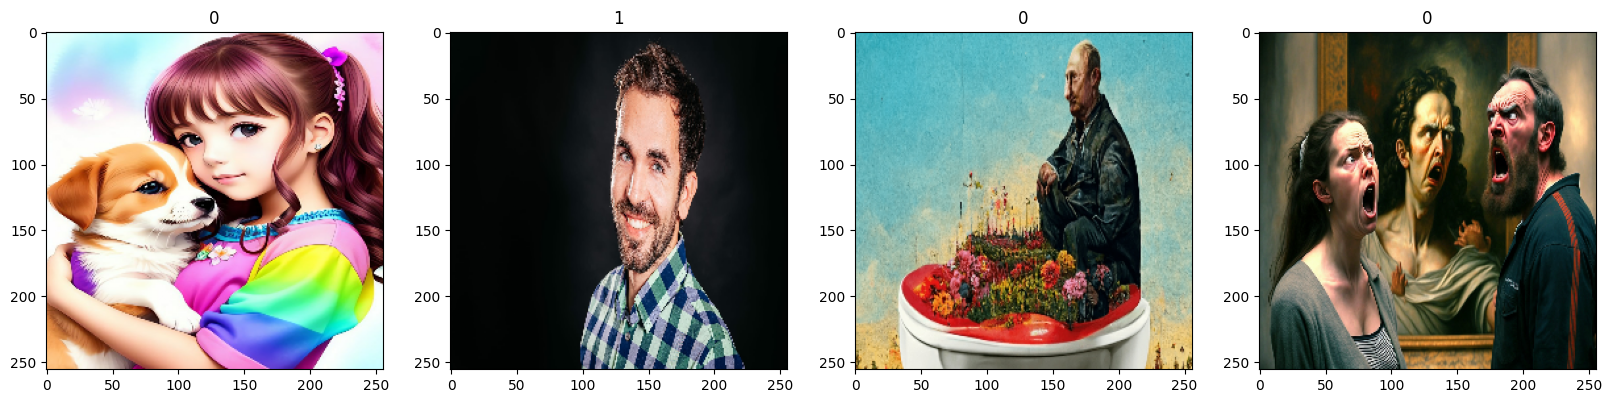

In [172]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

**Splitting data**

In [173]:
len(data)

31

In [174]:
from sklearn.model_selection import train_test_split


In [175]:
#val_size+train_size+test_size 

In [314]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [115]:
# AUTOTUNE = tf.data.AUTOTUNE

# train = data.prefetch(buffer_size=AUTOTUNE)
# val = data.prefetch(buffer_size=AUTOTUNE)
# test = data.prefetch(buffer_size=AUTOTUNE)

In [315]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [48]:
# train_size = tf.squeeze(train_size)
# val_size = tf.squeeze(val_size)
# test_size = tf.squeeze(test_size)

In [179]:
batch[1].size

32

**Building the Model**


In [255]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [316]:
model = Sequential()   

In [317]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))



model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
#model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
   

In [52]:
# model.add(Conv2D(16, (3,3), 1, activation='relu',input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))

# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))

# # convert conv2D 2-3 dimensionsal layer to 1D layer of the fully connected layer 
# model.add(Flatten())

# # Add fully connected layers with dropout
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))

# # Output layer
# model.add(Dense(1, activation='sigmoid'))


**Apply L2 Norm**

In [318]:
#with strategy.scope():
    #model = CreateModel()
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [291]:
#early_stop = EarlyStopping(monitor='val_accuracy', patience= 3)

In [319]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

**Train**

In [320]:
mkdir = 'logs'

In [321]:
logdir = 'logs'

In [322]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [323]:
hist = model.fit(train, epochs= 20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
 2/21 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4609 - loss: 2.5818 

W0000 00:00:1711459274.946977     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 874ms/step - accuracy: 0.5154 - loss: 1.8621 - val_accuracy: 0.5104 - val_loss: 0.6931
Epoch 2/20


W0000 00:00:1711459292.397283     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5581 - loss: 0.6899 - val_accuracy: 0.5677 - val_loss: 0.6879
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6032 - loss: 0.6728 - val_accuracy: 0.5417 - val_loss: 0.6910
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6161 - loss: 0.6805 - val_accuracy: 0.5208 - val_loss: 0.6836
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6019 - loss: 0.6481 - val_accuracy: 0.5260 - val_loss: 0.6789
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6460 - loss: 0.6455 - val_accuracy: 0.5000 - val_loss: 0.6820
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6721 - loss: 0.6020 - val_accuracy: 0.5052 - val_loss: 0.6549
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7156 - loss: 0.5565 - val_accuracy: 0.5729 - val_loss: 0.6423
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7569 - loss: 0.5317 - val_accuracy: 0.6042 - val_loss: 0.6172
Epo

In [60]:
hist.history

{'accuracy': [0.4753086566925049,
  0.5555555820465088,
  0.5905349850654602,
  0.5987654328346252,
  0.5288065671920776,
  0.5555555820465088,
  0.6255143880844116,
  0.6666666865348816,
  0.6255143880844116,
  0.7139917612075806,
  0.751028835773468,
  0.7818930149078369,
  0.7530864477157593,
  0.8004115223884583,
  0.8518518805503845,
  0.8374485373497009,
  0.8271604776382446,
  0.895061731338501,
  0.8930041193962097,
  0.9074074029922485],
 'loss': [3.6576783657073975,
  0.6903072595596313,
  0.6748269200325012,
  0.6540982723236084,
  0.681400716304779,
  0.6549397706985474,
  0.6388391256332397,
  0.6064902544021606,
  0.6178506016731262,
  0.5409839749336243,
  0.5125672221183777,
  0.4662419855594635,
  0.4944932162761688,
  0.413935124874115,
  0.37516340613365173,
  0.3988194167613983,
  0.3515739142894745,
  0.27994608879089355,
  0.2945317029953003,
  0.2528679668903351],
 'val_accuracy': [0.588477373123169,
  0.5452674627304077,
  0.5329217910766602,
  0.604938268661499

Current model is overfitting 


In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

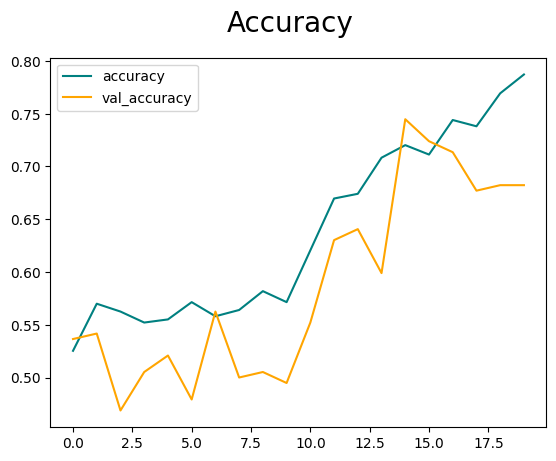

In [298]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [136]:
print(hist.history['loss'])

[1.0900646448135376, 0.68754643201828, 0.691142201423645, 0.6879842877388, 0.6774882078170776, 0.6804476976394653, 0.6795668601989746, 0.6514981985092163, 0.6491402387619019, 0.6591423749923706, 0.6316704750061035, 0.5909964442253113, 0.5690747499465942, 0.4979465901851654, 0.4600366950035095, 0.4297514855861664, 0.42373794317245483, 0.3712753355503082, 0.3648180365562439, 0.3171885311603546]


In [64]:
print(hist.history['val_accuracy'])

[0.588477373123169, 0.5452674627304077, 0.5329217910766602, 0.604938268661499, 0.5596708059310913, 0.6625514626502991, 0.5843621492385864, 0.5123456716537476, 0.7345678806304932, 0.790123462677002, 0.790123462677002, 0.8004115223884583, 0.8580247163772583, 0.8662551641464233, 0.8744856119155884, 0.8868312835693359, 0.9053497910499573, 0.9053497910499573, 0.9382715821266174, 0.9465020298957825]


**EVALUATION**

In [224]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [299]:
len(test)

4

In [300]:
pre = Precision()
re = Recall()
B_acc = BinaryAccuracy()

In [301]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    B_acc.update_state(y,yhat)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


In [228]:
print(yhat)

[[1.7920602e-05]
 [9.9206877e-01]
 [9.9125224e-01]
 [9.9791604e-01]
 [1.6634142e-09]
 [8.0913317e-01]
 [9.9999952e-01]
 [9.9768400e-01]
 [6.3946686e-07]
 [1.0000000e+00]
 [9.9999881e-01]]


In [302]:
print(f'Precision:{pre.result().numpy()}\nRecall:{re.result().numpy()}\nBinaryAccuracy:{B_acc.result().numpy()}')

Precision:0.694915235042572
Recall:0.6833333373069763
BinaryAccuracy:0.6542056202888489


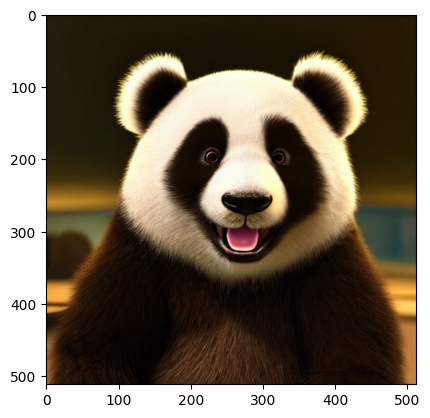

In [303]:
img = cv2.imread('/kaggle/input/testpanda/panda.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

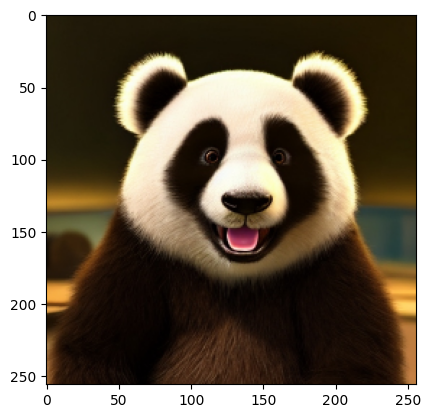

In [304]:
resize = tf.image.resize(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [305]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


In [306]:
yhat

array([[0.49348974]], dtype=float32)

In [307]:
if yhat > 0.5: 
    print(f'Predicted class is Real Images')
else:
    print(f'Predicted class is AI Generated')

Predicted class is AI Generated


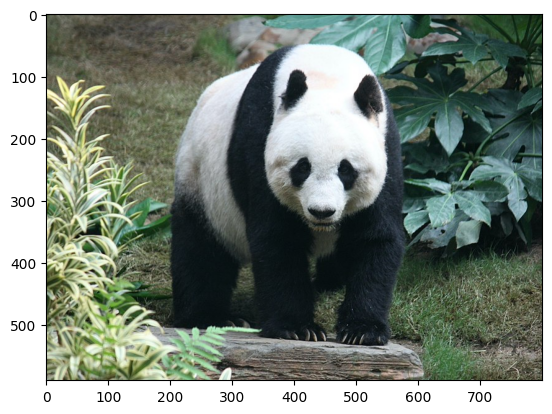

In [308]:
img_real = cv2.imread('/kaggle/input/realpandatest/Grosser_Panda.JPG')
plt.imshow(cv2.cvtColor(img_real,cv2.COLOR_BGR2RGB))
plt.show()

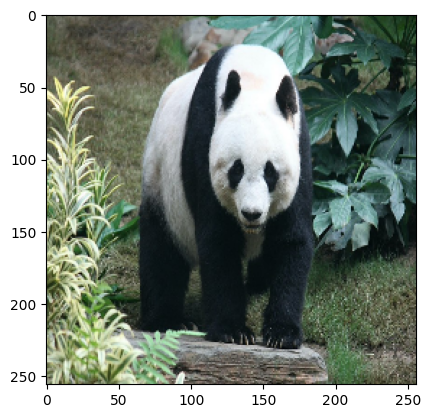

In [309]:
resize = tf.image.resize(cv2.cvtColor(img_real,cv2.COLOR_BGR2RGB), (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [310]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [311]:
yhat

array([[0.51538026]], dtype=float32)

In [312]:
if yhat > 0.5: 
    print(f'Predicted class is Real Images')
else:
    print(f'Predicted class is AI Generated')

Predicted class is Real Images


**SAVING MODEL**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
os.path.join('models','imageclassifier.h5')

In [ ]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if yhatnew > 0.5: 
    print(f'Predicted class is Real Images')
else:
    print(f'Predicted class is AI Generated')